# Espinardo FIB

#### FIB measurements @ Espinardo campus

- Sample C: 10^17 molecules /cm3

In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from IPython.display import Image as IM
from IPython.display import Math
from IPython.display import Latex

In [3]:
from PIL import Image, ImageFilter

In [4]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Apr 30 09:09:39 2019


In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tables            as tb
import random
import glob
import warnings
sns.set()

In [69]:
from sabat.sbt_espinardo import get_jpeg_dirs
from sabat.sbt_espinardo import get_files
from sabat.sbt_espinardo import read_xls_files
from sabat.sbt_espinardo import sort_by_list
from sabat.sbt_espinardo import sort_files
from sabat.sbt_espinardo import load_LIVE_images
from sabat.sbt_espinardo import expo_seed
from sabat.sbt_espinardo import  get_live_dirs
from sabat.sbt_espinardo import get_profile
from sabat.sbt_espinardo import display_profile
from sabat.sbt_espinardo import display_profiles_before_after
from sabat.sbt_espinardo import plot_LIVE_images
from sabat.sbt_espinardo import plot_LIVE_avg
from sabat.sbt_espinardo import plot_avg_intensity
from sabat.sbt_espinardo import plot_total_intensity
from sabat.sbt_espinardo import avg_intensity
from sabat.sbt_espinardo import total_intensity
from sabat.sbt_espinardo import plot_TOM
from sabat.sbt_espinardo import get_TOM_files
from sabat.sbt_espinardo import display_profiles
from sabat.sbt_espinardo import show_toms
from sabat.sbt_espinardo import mean_and_std_toms
from sabat.sbt_espinardo import tom_I, tom_mean_I
from sabat.sbt_espinardo import fit_intensity

In [19]:
import invisible_cities.core .fit_functions  as     fitf
from  invisible_cities.core.system_of_units import *

In [20]:
from sabat.sbt_types import FoV, CircularFoV, Monolayer
from sabat.sbt_types import Laser, PulsedLaser, GLaser, GaussianBeam
from sabat.sbt_types import Molecule
from sabat.sbt_types import Molecule2P
from sabat.sbt_types import DyeSample
from sabat.sbt_types import Microscope
from sabat.sbt_types import CCD
from sabat.sbt_core import  power_density
from sabat.sbt_core import  photon_density
from sabat.sbt_core import  fluorescence_per_molecule
from sabat.sbt_core import  duration_of_fluorescence
from sabat.sbt_core import  diffraction_limit
from sabat.sbt_core import  photoelectrons_per_pixel
from sabat.sbt_core import  fluorescence_2p_gb
from sabat.sbt_core import  fluorescence_2p_dl
from sabat.sbt_core import  absorbed_photons_per_fluorophore_per_pulse_2p
from sabat.sbt_types import  photon, molecule, GM, us, ucm2, ucm3, gp 

In [21]:
from sabat.sbt_core  import  FIB 
from sabat.sbt_core  import  FLUO3
from sabat.sbt_core import  Setup

## Sample C FIB

In [22]:
path = '/Users/jjgomezcadenas/Projects/Development/data/2Photon/'

In [23]:
ipath = os.path.join(path, 'sample_c_fib', 'BLEACHING_220mw')
print(ipath)

/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_c_fib/BLEACHING_220mw


### TOM files

In [24]:
TOM = get_files(ipath, ftype = 'TOM')
print(TOM.keys())

dict_keys(['TOMO03_before', 'TOMO04_before', 'TOMO03_after', 'TOMO04_after'])


### LIVE directories (XY scans)

In [12]:
LIVE = get_files(ipath, ftype = 'LIVE')
print(LIVE.keys())

dict_keys(['LIVE04_1-30', 'LIVE03_61-90', 'LIVE04_31-60', 'LIVE04_61-90', 'LIVE03_31-60'])


### TOM4b:  Tomography scan at 220 mW. 

In [13]:
tom04b = read_xls_files(TOM['TOMO04_before'])

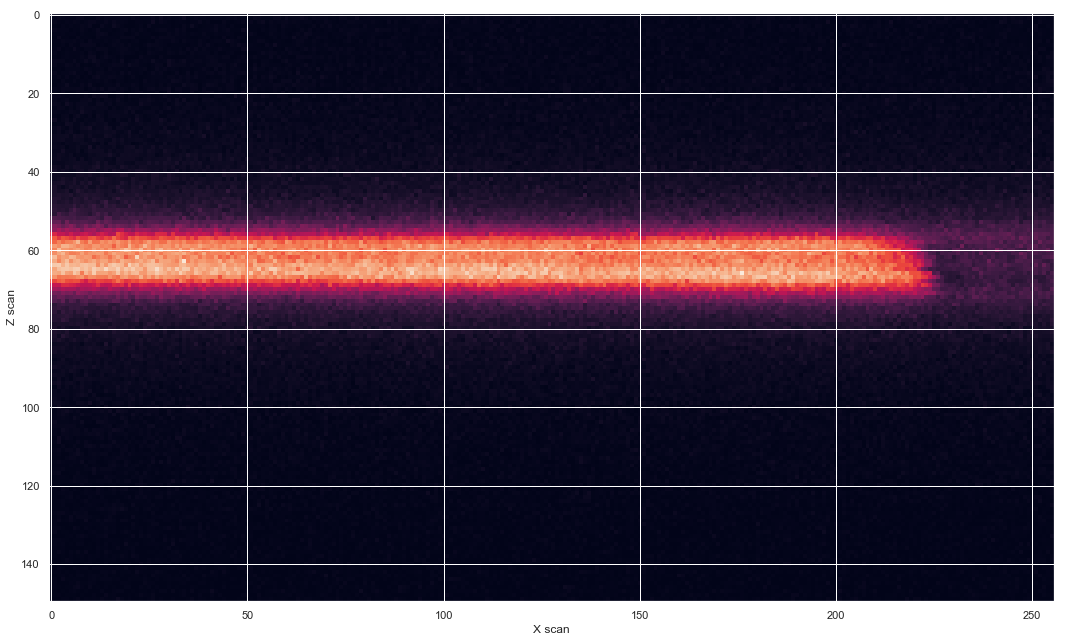

In [14]:
plot_TOM(tom04b, figsize=(18,12))

### Z profile

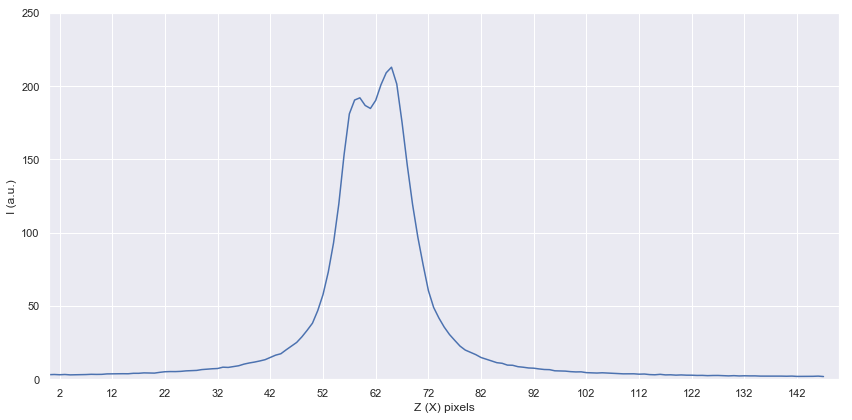

In [15]:
Z, ZV = get_profile(tom04b)
display_profile(tom04b, zrange=(0,150), yrange=(0,250))

In [24]:
print(f' Total profile intensity (AU) = {np.sum(ZV)}')

 Total profile intensity (AU) = 4187.640625


### X profile

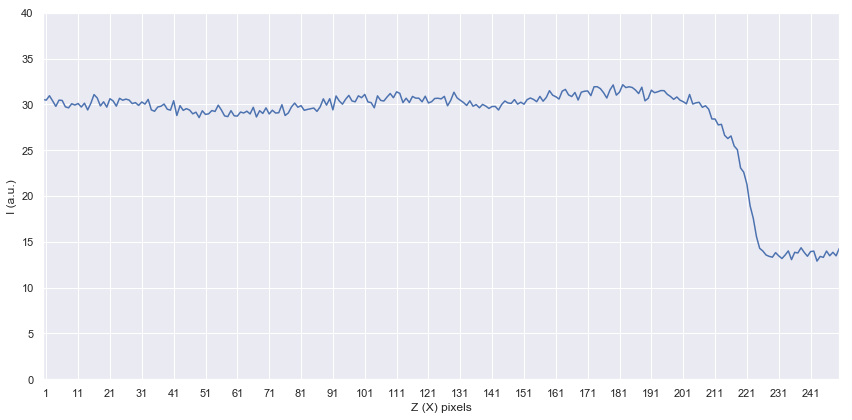

In [25]:
X, XV = get_profile(tom04b.T)
display_profile(tom04b.T, zrange=(0,250), yrange=(0,40))

In [26]:
print(f' Total profile intensity (AU) = {np.sum(XV)}')

 Total profile intensity (AU) = 7110.98


### TOM04b: Tomography scan after shots

In [27]:
tom04a = read_xls_files(TOM['TOMO04_after'])

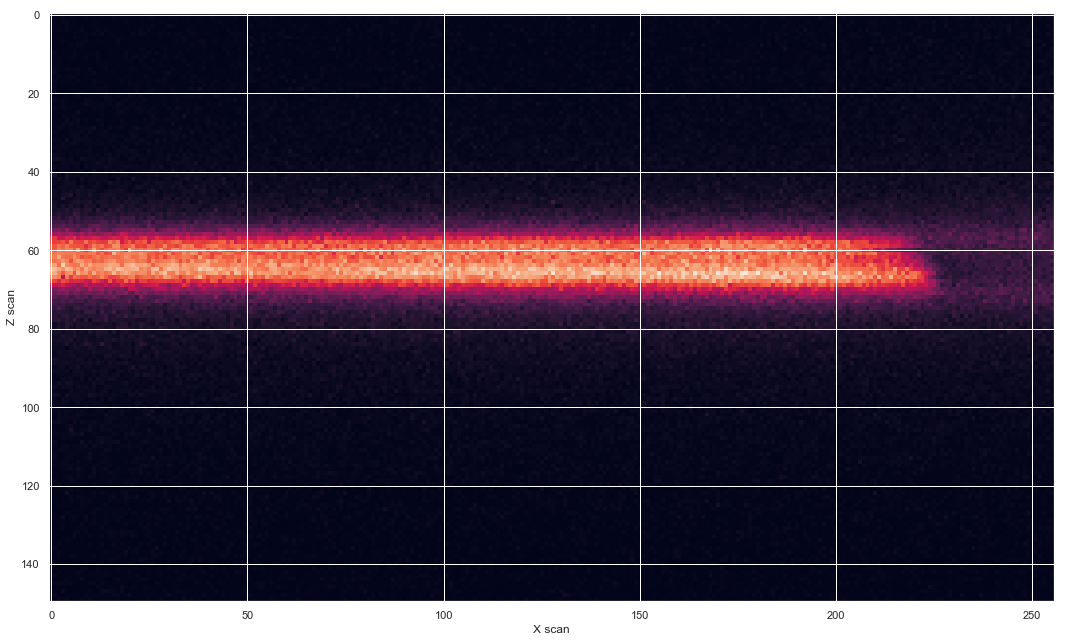

In [28]:
plot_TOM(tom04a, figsize=(18,12))

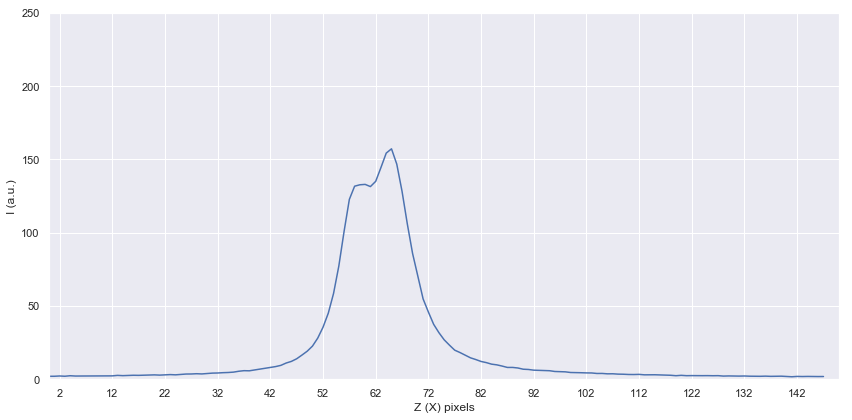

In [29]:
Z, ZV = get_profile(tom04a)
display_profile(tom04a, zrange=(0,150), yrange=(0,250))

In [30]:
print(f' Total profile intensity (AU) = {np.sum(ZV)}')

 Total profile intensity (AU) = 2961.30078125


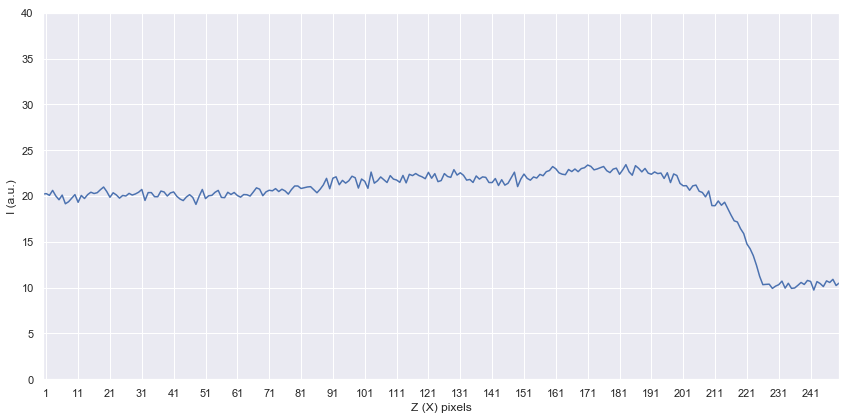

In [31]:
X, XV = get_profile(tom04a.T)
display_profile(tom04a.T, zrange=(0,250), yrange=(0,40))

In [32]:
print(f' Total profile intensity (AU) = {np.sum(XV)}')

 Total profile intensity (AU) = 5029.986666666668


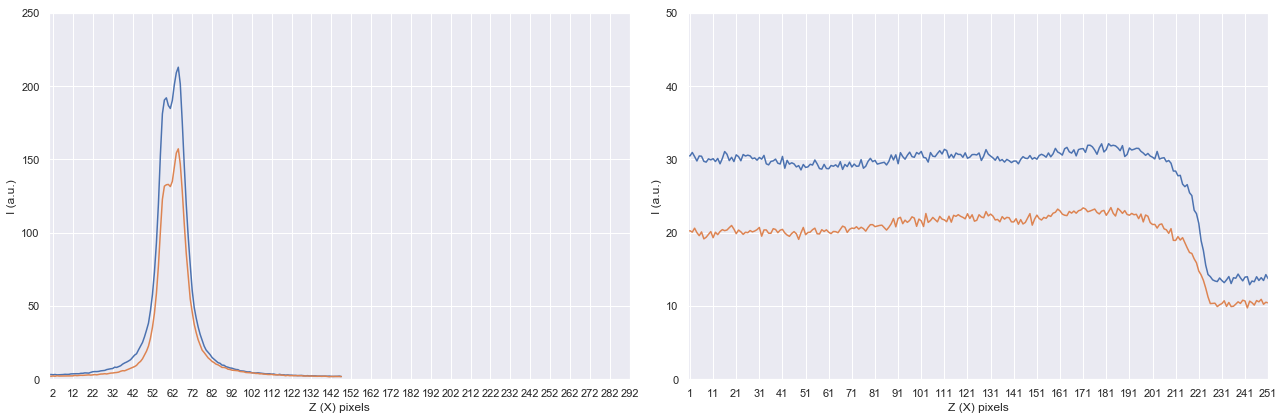

In [35]:
display_profiles_before_after(tom04b, tom04a, zrange=(0,150), yrange=(0,250), ztrange=(0,250), ytrange=(0,50), figsize=(18,6))

#### Overall photobleaching:

- Plots above show the overall photobleaching after 90 "shots" at 220 mW.

### SHOTS

### LIVE 1-30

In [26]:
files = glob.glob(LIVE['LIVE04_1-30']+'/*.jpg')

In [27]:
sfiles = sort_files(files)

In [28]:
DF1 = load_LIVE_images(sfiles)

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


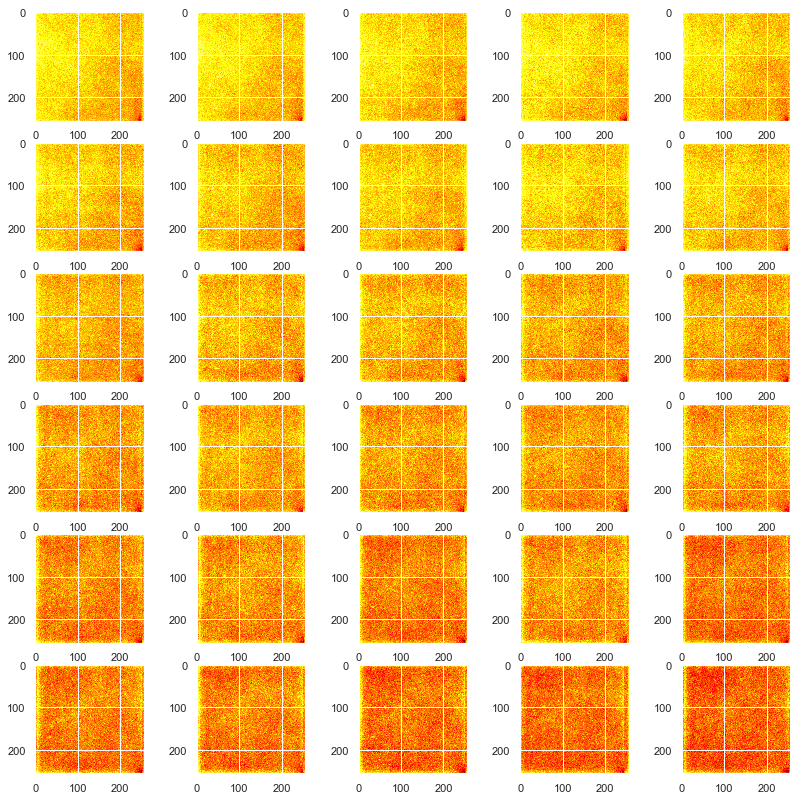

In [29]:
plot_LIVE_images(DF1, nx=6, ny=5, figsize=(14,14))

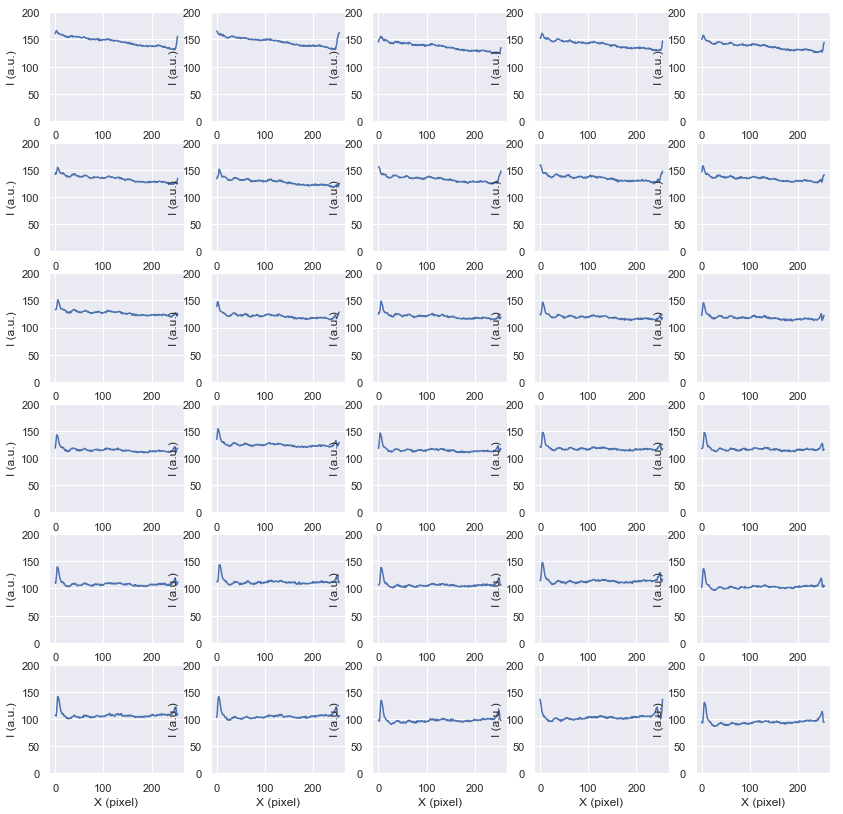

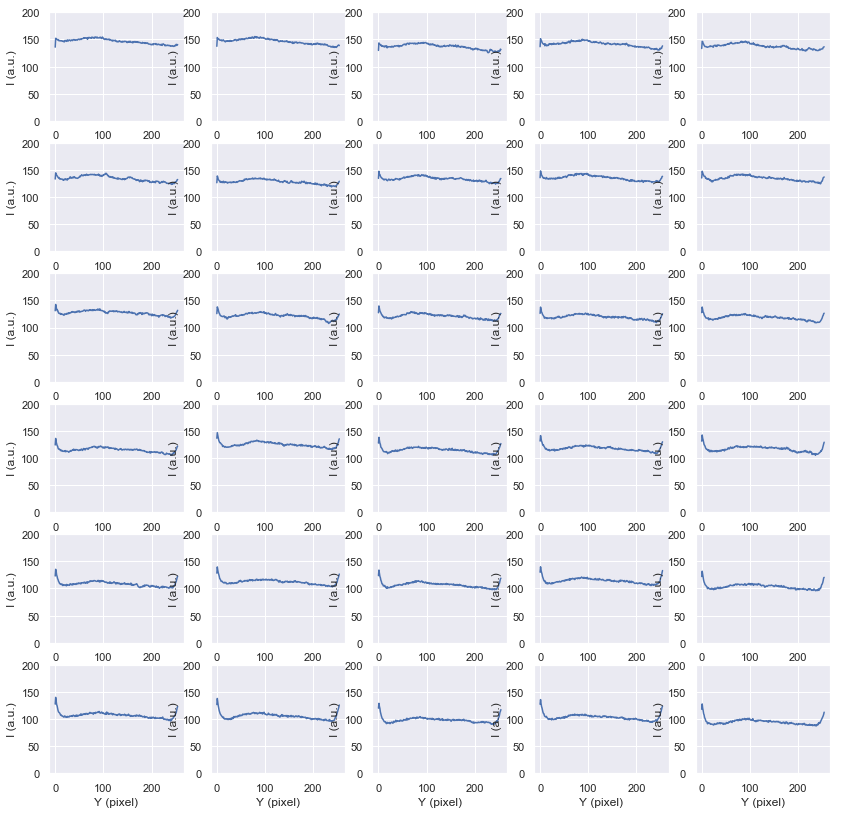

In [30]:
plot_LIVE_avg(DF1, xpixel =(0, 255), ypixel = (0,255), imax=200, nx=6, ny=5, figsize=(14,14))

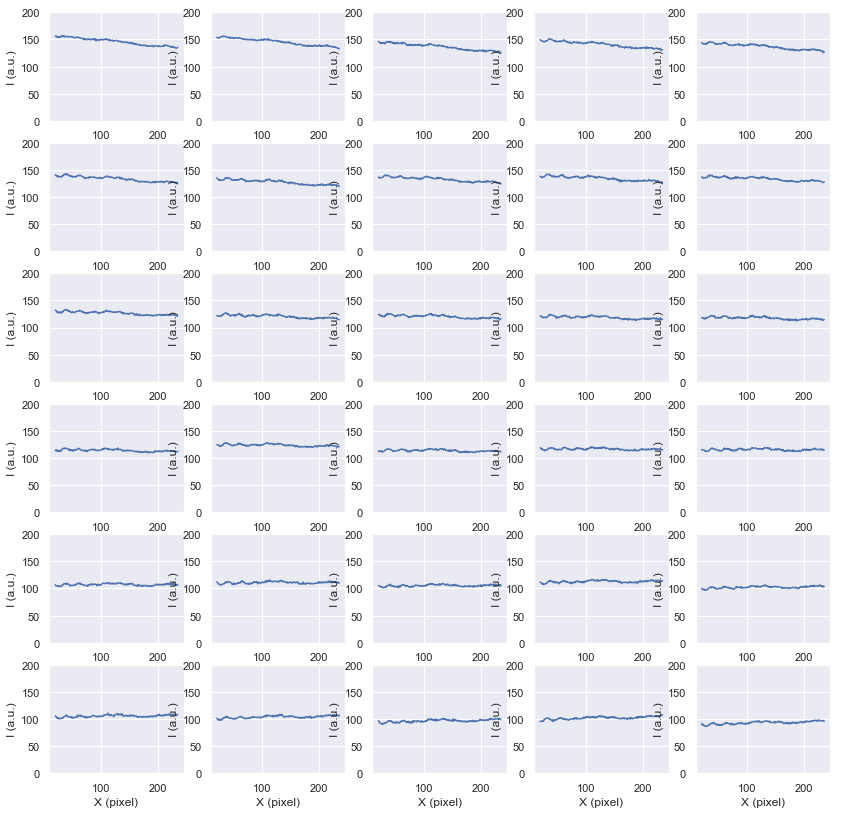

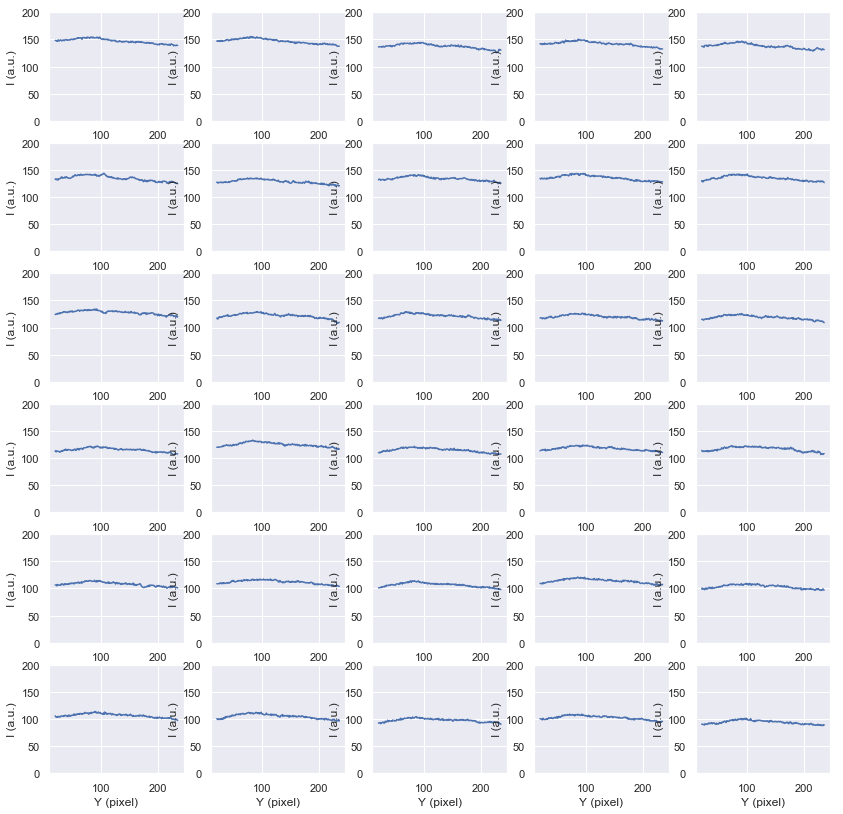

In [31]:
plot_LIVE_avg(DF1, xpixel =(20, 236), ypixel = (20,236), imax=200, nx=6, ny=5, figsize=(14,14))

In [33]:
avg_df1 = np.mean(avg_intensity(DF1))
std_df1 = np.std(avg_intensity(DF1))
print(f' average intensity per pixel = {avg_df1} +- {std_df1}')

 average intensity per pixel = 120.70995585123698 +- 14.01468676042478


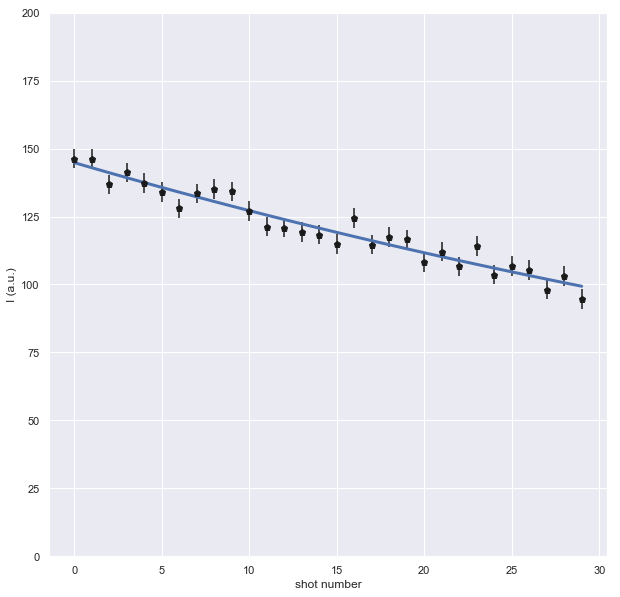

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a20d5c9d8>, values=array([144.81459295, -76.97311926]), errors=array([1.40336483, 3.77961248]), chi2=1.0330841521927518, pvalue=0.41627040943313043, cov=array([[ 1.96943285,  4.38999213],
       [ 4.38999213, 14.28547052]]))


In [71]:
fit_df1, err_df1 = fit_intensity(DF1, sigma=std_df1/np.sqrt(15), imax=200, figsize=(10,10))

In [49]:
files = glob.glob(LIVE['LIVE04_31-60']+'/*.jpg')
sfiles = sort_files(files)
DF2 = load_LIVE_images(sfiles)

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


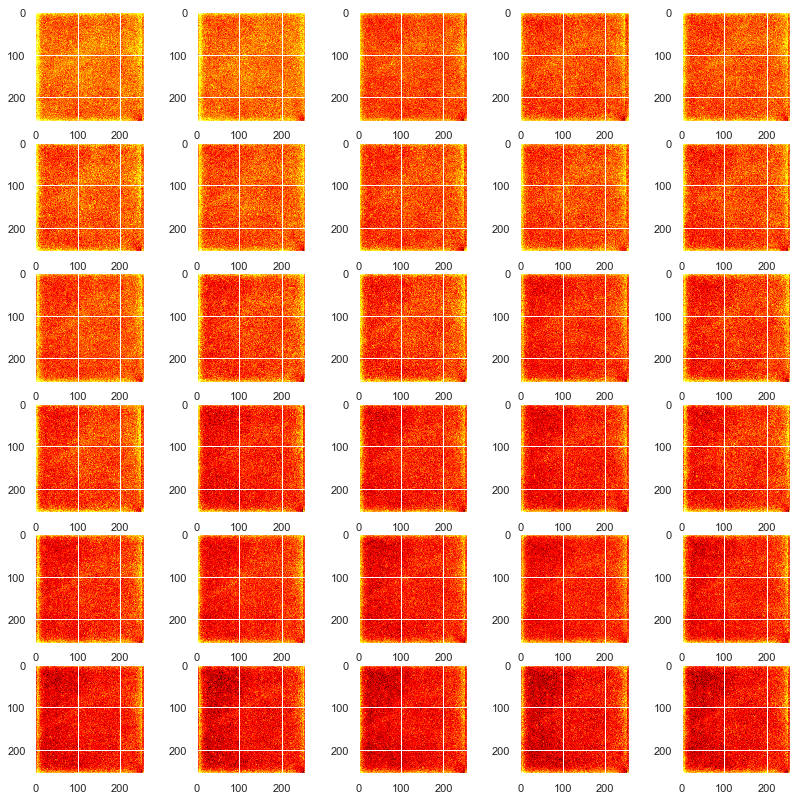

In [50]:
plot_LIVE_images(DF2, nx=6, ny=5, figsize=(14,14))

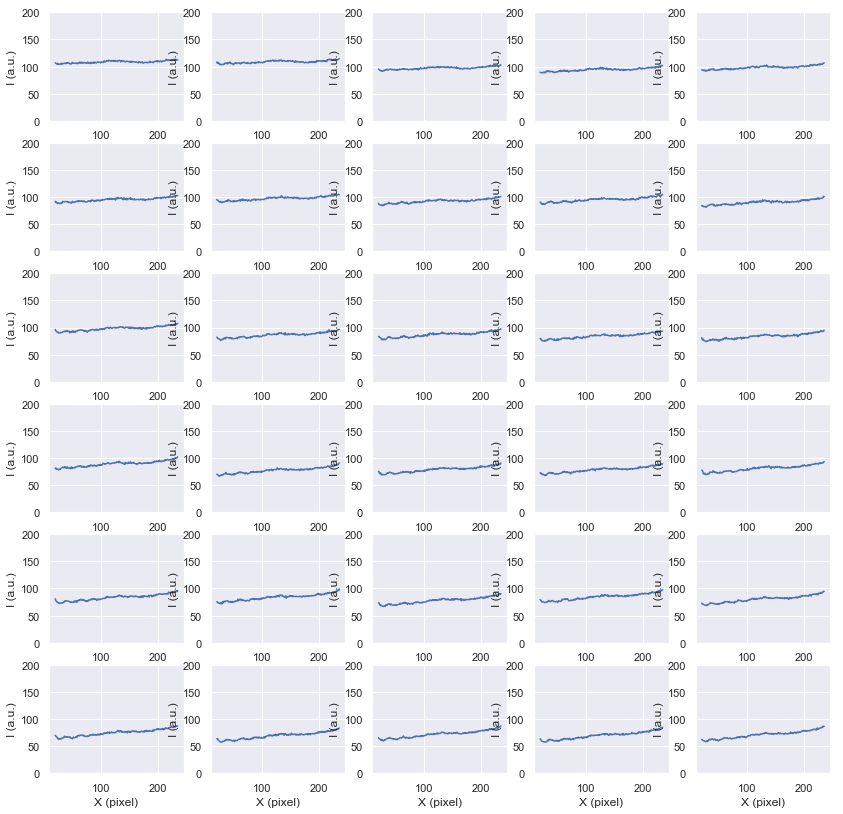

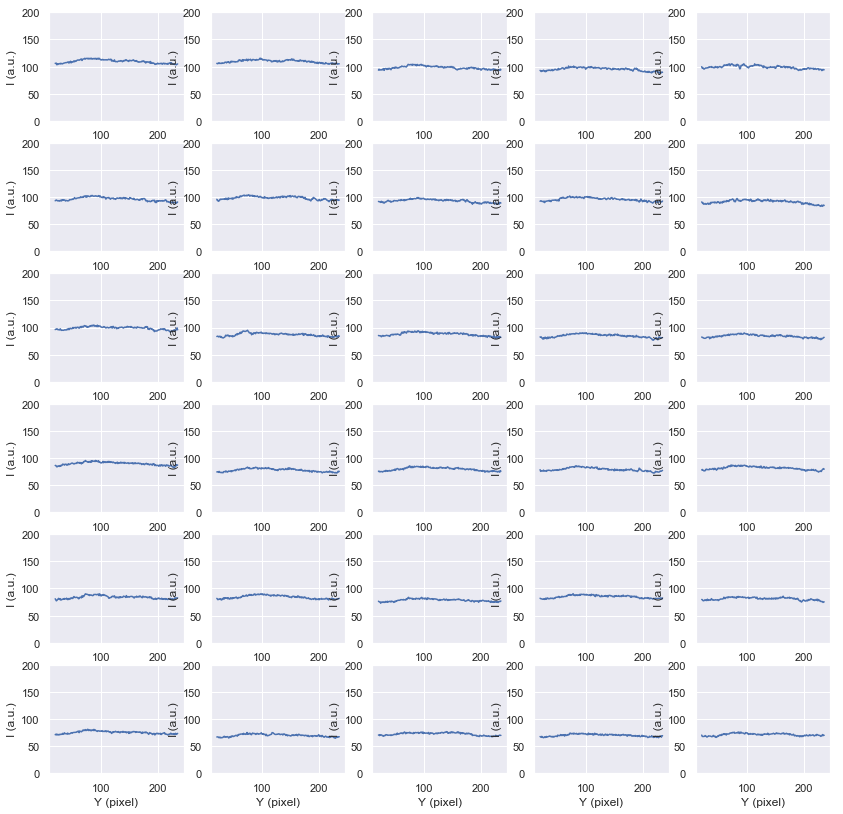

In [51]:
plot_LIVE_avg(DF2, xpixel =(20, 236), ypixel = (20,236), imax=200, nx=6, ny=5, figsize=(14,14))

 average intensity per pixel = 88.67396087646485 +- 10.350751190448289


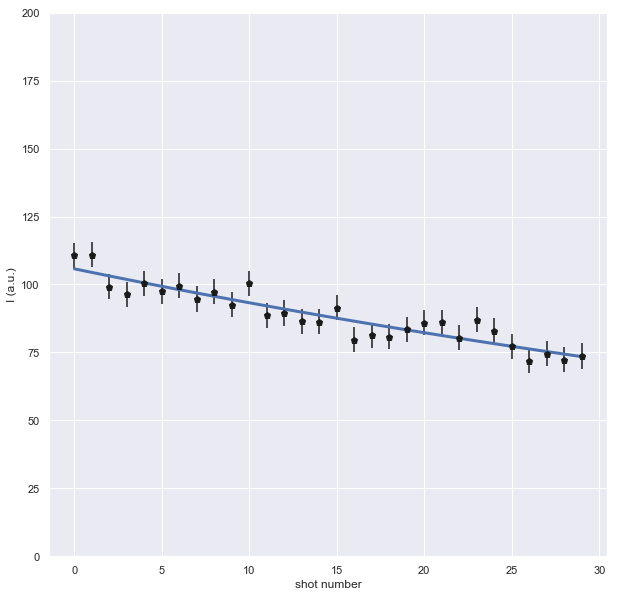

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a20d5c9d8>, values=array([105.76418984, -79.58846104]), errors=array([1.79045448, 7.03289658]), chi2=0.7459209447339245, pvalue=0.8300783692171508, cov=array([[ 3.20572724, 10.43479737],
       [10.43479737, 49.46163436]]))


In [75]:
avg_df2 = np.mean(avg_intensity(DF2))
std_df2 = np.std(avg_intensity(DF2))
print(f' average intensity per pixel = {avg_df2} +- {std_df2}')

fit_df2, err_df2 = fit_intensity(DF2, sigma=std_df2/np.sqrt(5), imax=200, figsize=(10,10))

In [55]:
files = glob.glob(LIVE['LIVE04_61-90']+'/*.jpg')
sfiles = sort_files(files)
DF3 = load_LIVE_images(sfiles)

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


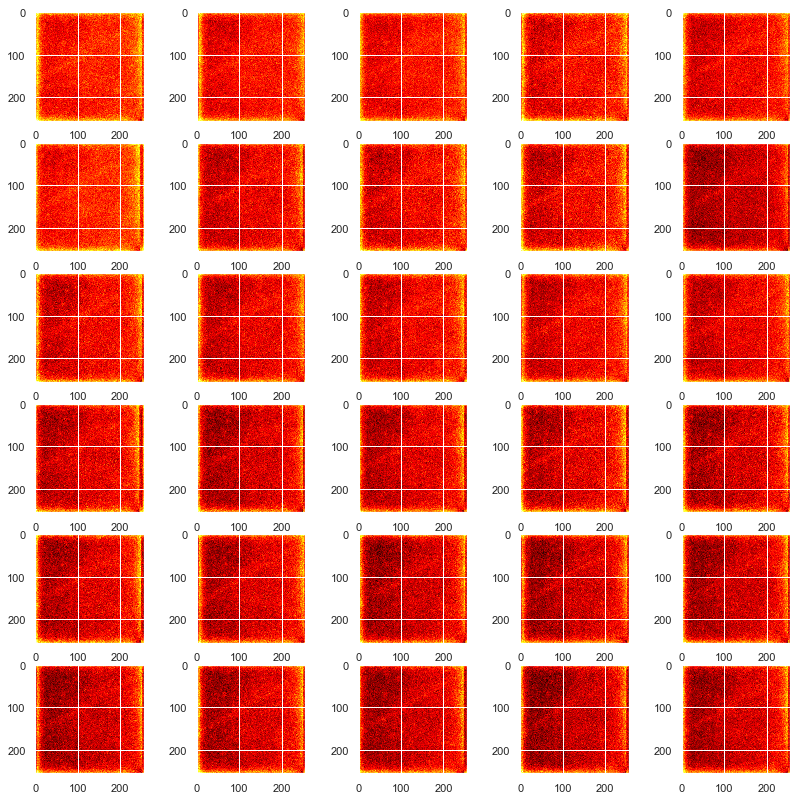

In [56]:
plot_LIVE_images(DF3, nx=6, ny=5, figsize=(14,14))

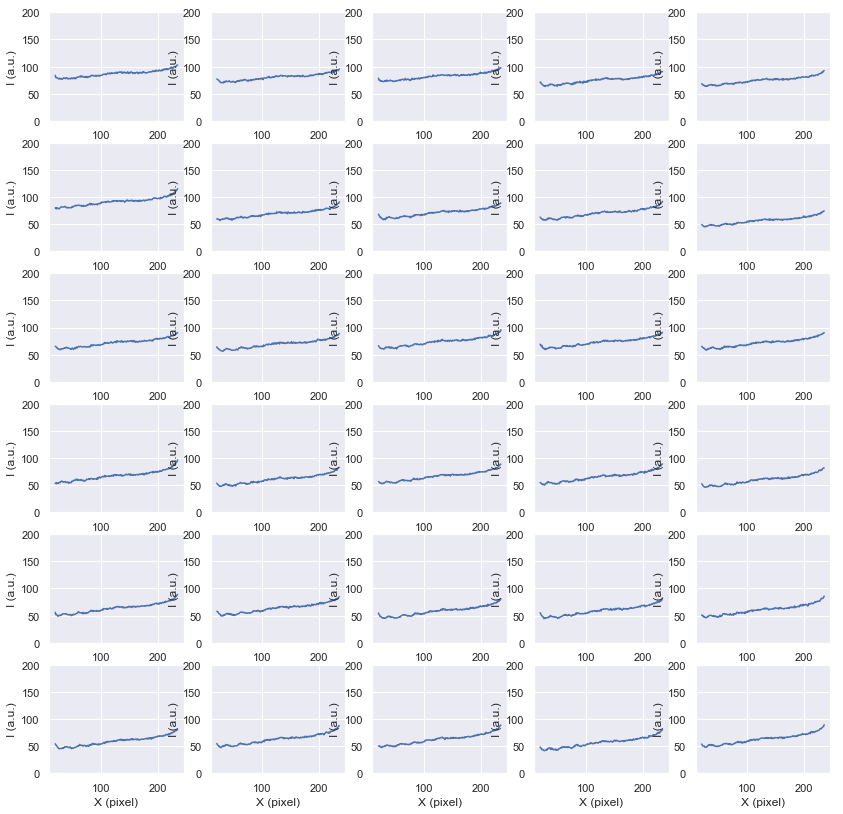

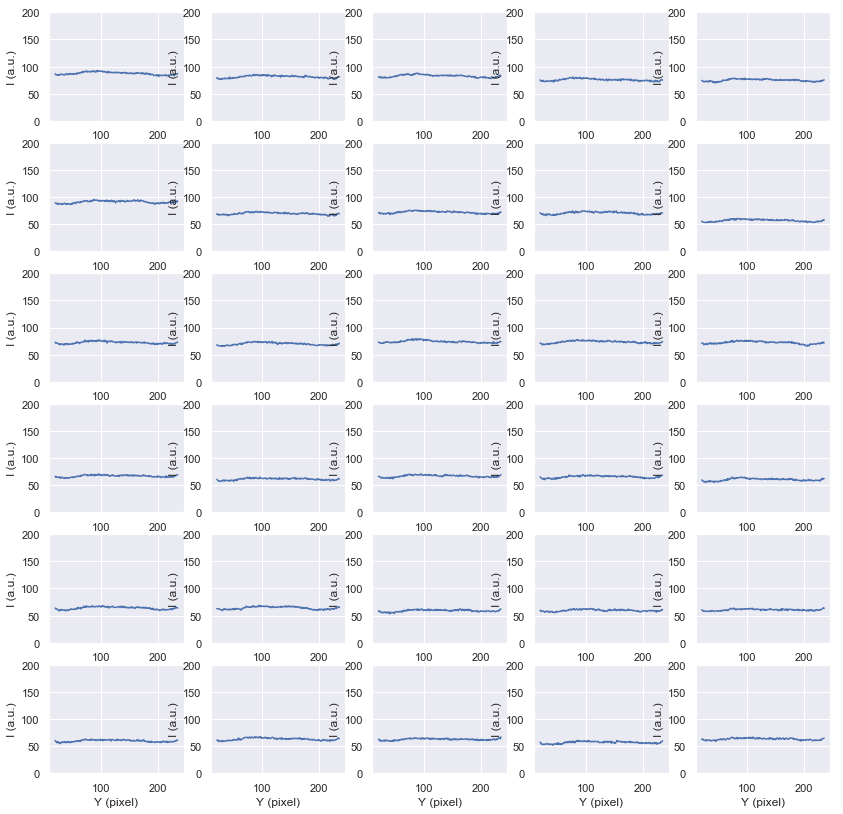

In [57]:
plot_LIVE_avg(DF3, xpixel =(20, 236), ypixel = (20,236), imax=200, nx=6, ny=5, figsize=(14,14))

 average intensity per pixel = 71.73572896321615 +- 8.54905979199317


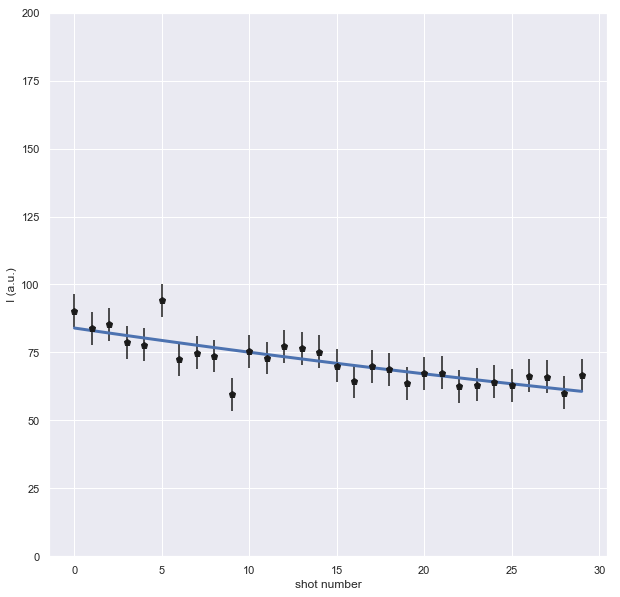

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a2357f048>, values=array([ 83.98717334, -89.24769771]), errors=array([ 2.31830102, 14.25426211]), chi2=0.7555813159955701, pvalue=0.8187732661240703, cov=array([[  5.37451962,  27.49279747],
       [ 27.49279747, 203.18398843]]))


In [76]:
avg_df3 = np.mean(avg_intensity(DF3))
std_df3 = np.std(avg_intensity(DF3))
print(f' average intensity per pixel = {avg_df3} +- {std_df3}')

fit_df3, err_df3 = fit_intensity(DF3, sigma=std_df3/np.sqrt(2), imax=200, figsize=(10,10))

In [77]:
print(f'Evolution of PB, fits: shot1  ->{fit_df1};shot2->{fit_df2}; shot3->{fit_df3}')
print(f'Evolution of PB, errors: shot1->{err_df1};shot2->{err_df2}; shot3->{err_df3}')

Evolution of PB, fits: shot1  ->[144.81459295 -76.97311926];shot2->[105.76418984 -79.58846104]; shot3->[ 83.98717334 -89.24769771]
Evolution of PB, errors: shot1->[1.40336483 3.77961248];shot2->[1.79045448 7.03289658]; shot3->[ 2.31830102 14.25426211]


### Compatible with a single lifetime

In [78]:
DF = DF1 + DF2 + DF3

 average intensity per pixel = 93.70654856363932 +- 23.193848152831304


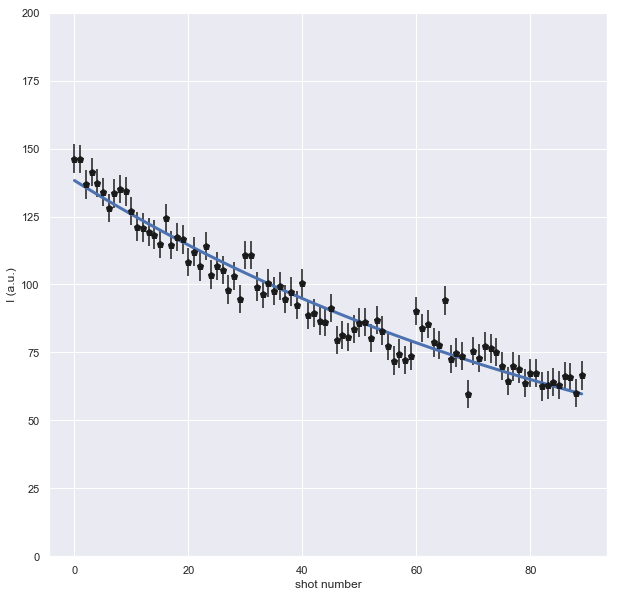

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a234f8598>, values=array([ 138.26417212, -106.09149743]), errors=array([1.3076329 , 2.63317739]), chi2=1.1278024633546628, pvalue=0.19382952441953313, cov=array([[1.7099038 , 2.75522695],
       [2.75522695, 6.93362315]]))


In [81]:
avg_df = np.mean(avg_intensity(DF))
std_df = np.std(avg_intensity(DF))
print(f' average intensity per pixel = {avg_df} +- {std_df}')

fit_df, err_df = fit_intensity(DF, sigma=std_df/np.sqrt(20), imax=200, figsize=(10,10))


        Pulsed Laser:
        wavelength                =8.0e+02 nm
        photon energy             =1.6e+00 eV
        power                     =1.3e+02 mW
        repetition rate           =7.6e+01 kHz
        pulse width               =4.0e+02 fs
        energy per pulse          =1.0e+04 fJ
        energy per second         =1.3e+02 mJ
        photons per second        =5.3e+17 ph/second
        

        name                 = JMB
        NA                   =   0.5
        M                    =  20.0
        eff dichroic         =  0.70
        eff filter           =  1.00
        eff PMT              =  0.10
        Optical transmission =  0.96
        Filter  transmission =  0.70
        Total transmission   =  0.07
        

        w0                   =   0.5 micron
        zr                   =   1.0 micron
        DOF                  =   2.0 micron
        
 Diffraction limit transverse size of beam = 0.9760000000000002
pixel size = 3.5e-01 mum
time per pixel =29.2

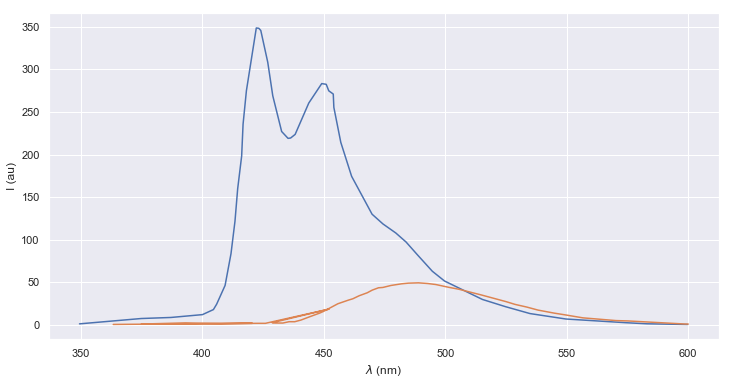

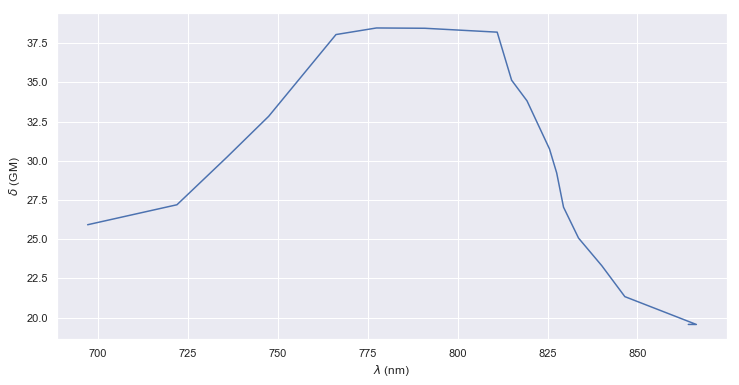

In [85]:
s3 = Setup(            setup_name             = 'Espinardo',
                        molecule_name          = 'FIB',
                        sample_name            = '2c',
                        sample_concentration   = 1E+6/6 * nanomole/liter,
                        laser_lambda           = 800 * nm,
                        laser_power            = 220 * mW,
                        laser_eff              = 0.6,
                        laser_lambda_eff       = 1,
                        laser_f                = 76  * megahertz,
                        laser_tau              = 400 * femtosecond,
                        mc_name                = 'JMB',
                        mc_NA                  = 0.5,
                        mc_M                   = 20,
                        mc_eff_dic             = 0.7,
                        mc_eff_filt            = 1.0,
                        mc_eff_PMT             = 0.1,
                        n_pixels               = 256,
                        scan_length            = 90 * mum,
                        v_per_line             = 40)

In [92]:
avg_l0 = 121
F = s3.fluorescence(n_photons=3)
nf = s3.photons_per_pixel(n_photons=3)
pnm = s3.photons_per_pixel_per_molecule(n_photons=3)
nd = s3.detected_photons_per_pixel(n_photons=3)
IN = avg_l0 / nd
print(f' F = {F/us:5.1e}  photons/second')
print(f' nf = {nf:5.1e} photons/pixel (about 30 mus)')
print(f' nm = {pnm:5.1e} photons/pixel/molecule (about 30 mus)')
print(f' nd = {nd:5.1e} detected photons/pixel (about 30 mus)')
print(f' number of photons per count = {IN:5.1e} ')

 F = 2.3e+07  photons/second
 nf = 6.7e+02 photons/pixel (about 30 mus)
 nm = 4.0e-03 photons/pixel/molecule (about 30 mus)
 nd = 4.5e+01 detected photons/pixel (about 30 mus)
 number of photons per count = 2.7e+00 
